<a href="https://colab.research.google.com/github/trungnguyen020/6351071072_LAB2/blob/main/6351071072_LAB2_Bai2_Trang32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nguyễn Đức Trung - 6351071072
Đang khởi tạo và tính toán... Vui lòng đợi trong giây lát.

--- 1. Xử lý Adult Dataset ---
Lỗi khi chạy model ID3 (Entropy) trên Adult Income: Found array with 0 sample(s) (shape=(0, 488)) while a minimum of 1 is required by DecisionTreeClassifier.
Lỗi khi chạy model CART (Gini) trên Adult Income: Found array with 0 sample(s) (shape=(0, 488)) while a minimum of 1 is required by DecisionTreeClassifier.
Lỗi khi chạy model Naive Bayes trên Adult Income: Found array with 0 sample(s) (shape=(0, 488)) while a minimum of 1 is required by GaussianNB.
--- 2. Xử lý Wine Dataset ---
--- 3. Xử lý Heart Dataset ---
--- 4. Xử lý Mushroom Dataset ---
--- 5. Xử lý Digits Dataset ---

BẢNG TỔNG HỢP F-MEASURE (VÀ CÁC CHỈ SỐ KHÁC) CỦA CÁC BÀI TẬP
               Dataset          Model  Precision  Recall  F-measure
0         Wine Quality  ID3 (Entropy)     0.5603  0.5792     0.5594
1         Wine Quality    CART (Gini)     0.5353  0.5687     0.5485
2         Wine Quality    Na

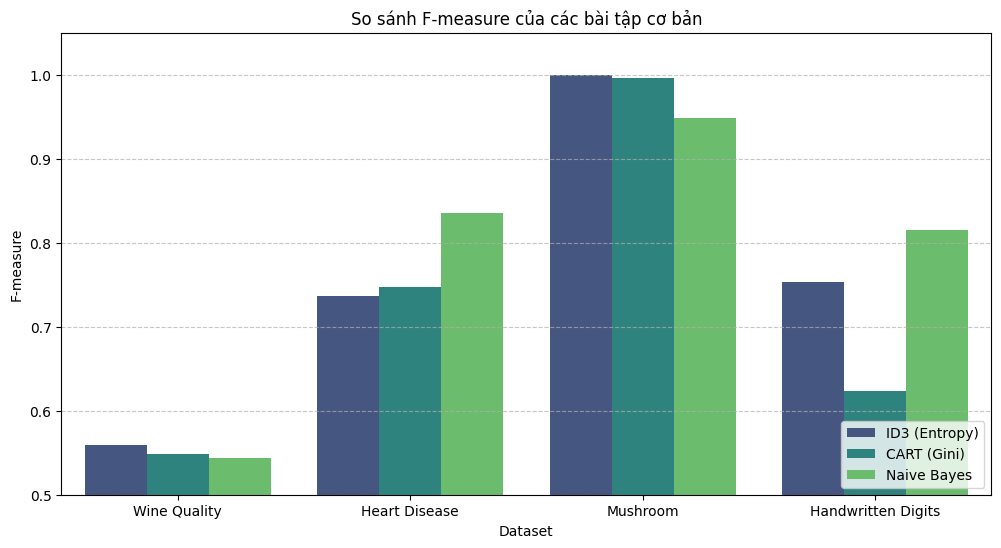

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Nguyễn Đức Trung - 6351071072")
print("Đang khởi tạo và tính toán... Vui lòng đợi trong giây lát.\n")
final_report = []
def evaluate_and_log(dataset_name, X_train, X_test, y_train, y_test, models=None):
    if models is None:
        models = {
            'ID3 (Entropy)': DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5),
            'CART (Gini)': DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=5),
            'Naive Bayes': GaussianNB()
        }

    for model_name, model in models.items():
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

            final_report.append({
                'Dataset': dataset_name,
                'Model': model_name,
                'Accuracy': acc,
                'Precision': prec,
                'Recall': rec,
                'F-measure': f1
            })
        except Exception as e:
            print(f"Lỗi khi chạy model {model_name} trên {dataset_name}: {e}")

print("--- 1. Xử lý Adult Dataset ---")
try:
    cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
            'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
            'hours-per-week', 'native-country', 'Income']
    df_train = pd.read_csv('adult.data.csv', names=cols, header=None, na_values=[' ?', '?', '? '], skipinitialspace=True)
    df_test = pd.read_csv('adult.test.csv', names=cols, header=None, skiprows=1, na_values=[' ?', '?', '? '], skipinitialspace=True)

    df_train.dropna(inplace=True)
    df_test.dropna(inplace=True)

    if 'fnlwgt' in df_train.columns: df_train.drop('fnlwgt', axis=1, inplace=True)
    if 'fnlwgt' in df_test.columns: df_test.drop('fnlwgt', axis=1, inplace=True)

    df_test['Income'] = df_test['Income'].astype(str).str.replace('.', '', regex=False)

    len_train = len(df_train)
    data = pd.concat([df_train, df_test], axis=0, ignore_index=True)
    X = pd.get_dummies(data.drop('Income', axis=1), drop_first=True)
    y = LabelEncoder().fit_transform(data['Income'])

    X_train = X.iloc[:len_train]
    X_test = X.iloc[len_train:]
    y_train = y[:len_train]
    y_test = y[len_train:]

    evaluate_and_log('Adult Income', X_train, X_test, y_train, y_test)
except FileNotFoundError:
    print("❌ Thiếu file adult.data.csv hoặc adult.test.csv")
print("--- 2. Xử lý Wine Dataset ---")
try:
    try:
        df = pd.read_csv('winequality-red.csv', sep=None, engine='python')
    except:
        df = pd.read_csv('winequality-red.csv')

    df.dropna(inplace=True)
    X = pd.get_dummies(df.drop('quality', axis=1), drop_first=True)
    y = LabelEncoder().fit_transform(df['quality'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    evaluate_and_log('Wine Quality', X_train, X_test, y_train, y_test)
except FileNotFoundError:
    print("❌ Thiếu file winequality-red.csv")

print("--- 3. Xử lý Heart Dataset ---")
try:
    df = pd.read_csv('heart.csv')
    df.dropna(inplace=True)
    new_names = {'age': 'age', 'sex': 'sex', 'cp': 'chest_pain_type', 'trestbps': 'resting_blood_pressure',
                 'chol': 'cholesterol', 'fbs': 'fasting_blood_sugar', 'restecg': 'rest_ecg',
                 'thalach': 'max_heart_rate_achieved', 'exang': 'exercise_induced_angina',
                 'oldpeak': 'st_depression', 'slope': 'st_slope', 'ca': 'num_major_vessels',
                 'thal': 'thalassemia', 'target': 'target'}
    df.rename(columns=new_names, inplace=True)

    X = pd.get_dummies(df.drop('target', axis=1), drop_first=True)
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    evaluate_and_log('Heart Disease', X_train, X_test, y_train, y_test)
except FileNotFoundError:
    print("❌ Thiếu file heart.csv")
print("--- 4. Xử lý Mushroom Dataset ---")
try:
    df = pd.read_csv('mushrooms.csv')
    df.dropna(inplace=True)

    X = pd.get_dummies(df.drop('class', axis=1), drop_first=True)
    y = LabelEncoder().fit_transform(df['class'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    evaluate_and_log('Mushroom', X_train, X_test, y_train, y_test)
except FileNotFoundError:
    print("❌ Thiếu file mushrooms.csv")
print("--- 5. Xử lý Digits Dataset ---")
try:
    digits = datasets.load_digits()
    data = digits.images.reshape((len(digits.images), -1))
    X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=False)
    evaluate_and_log('Handwritten Digits', X_train, X_test, y_train, y_test)
except Exception as e:
    print(f"❌ Lỗi Digits: {e}")
if final_report:
    results_df = pd.DataFrame(final_report)
    pd.set_option('display.float_format', '{:.4f}'.format)

    print("\n" + "="*80)
    print("BẢNG TỔNG HỢP F-MEASURE (VÀ CÁC CHỈ SỐ KHÁC) CỦA CÁC BÀI TẬP")
    print("="*80)
    print(results_df[['Dataset', 'Model', 'Precision', 'Recall', 'F-measure']])
    plt.figure(figsize=(12, 6))
    sns.barplot(data=results_df, x='Dataset', y='F-measure', hue='Model', palette='viridis')
    plt.title('So sánh F-measure của các bài tập cơ bản')
    plt.ylim(0.5, 1.05)
    plt.legend(loc='lower right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Không có dữ liệu để báo cáo. Vui lòng kiểm tra lại file upload.")